In [1]:
import dabench as dab
import matplotlib.pyplot as plt
import numpy as np

<frozen importlib._bootstrap>:241: UserWarning: No pyfftw detected. Using numpy.fft


# 1. Basic stationary observer with random sampling by *count*

The first step is to define a data generator and generate/load data for the observer. Let's use a Lorenz63 generator as a basic starting point.

In [2]:
l63 = dab.data.Lorenz63()
l63.generate(n_steps=50)

In [3]:
# Now we can define the observer:
obs_l63 = dab.observer.Observer(
    l63, # Data generator object
    random_time_count = 20, # Pick 20 timesteps for sampling
    random_location_count = 1, # Pick one location in the system for sampling
    error_bias = 0.0, # Mean for observation error, Gaussian/Normal distribution
    error_sd = 0.7, # Standard deviation for observation error, Gaussian/Normal distribution
    random_seed=99 # We can specify a random seed. Default is 99
)

# Making observations
obs_vec_l63 = obs_l63.observe()

In [4]:
# Let's examine that object
print('Sampling times: ', obs_vec_l63.times)
print('Number of observations: ', obs_vec_l63.num_obs)
print('Number of locations at each timestep: ', obs_vec_l63.obs_dims[0])
print('Sampling location indices: ', obs_vec_l63.location_indices[0])
print('Observation values: ', obs_vec_l63.values)

Sampling times:  [0.05 0.06 0.12 0.16 0.18 0.19 0.22 0.23 0.24 0.25 0.27 0.29 0.3  0.34
 0.36 0.37 0.43 0.44 0.45 0.46]
Number of observations:  20
Number of locations at each timestep:  1
Sampling location indices:  [1]
Observation values:  [[-15.51101746]
 [-15.63084999]
 [-11.9788614 ]
 [ -7.43437412]
 [ -4.94812204]
 [ -5.31448538]
 [ -2.64207745]
 [ -1.85146711]
 [ -2.03815694]
 [ -0.90402463]
 [ -1.24896995]
 [ -0.3523532 ]
 [ -0.69936886]
 [ -0.64733011]
 [ -2.22313773]
 [ -1.87359053]
 [ -1.15229503]
 [ -2.13185187]
 [ -2.48536021]
 [ -1.93566991]]


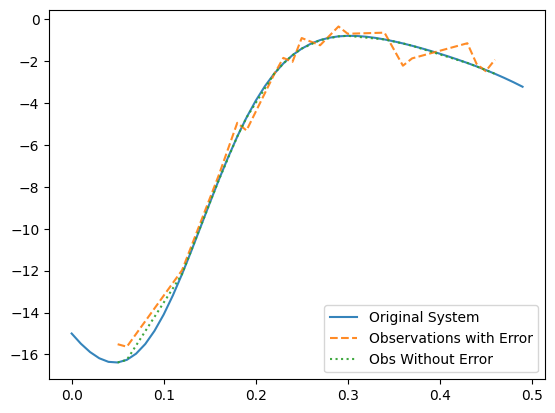

In [5]:
# Let's examine how error is added to observations
fig, ax = plt.subplots()
ax.plot(l63.times, l63.values[:, 1], alpha=0.9)
ax.plot(obs_vec_l63.times, obs_vec_l63.values[:, 0], '--', alpha=0.9)
obs_values_minus_error = obs_vec_l63.values - obs_vec_l63.errors
ax.plot(obs_vec_l63.times, obs_values_minus_error[:, 0], ':', alpha=0.9)
ax.legend(labels=['Original System', 'Observations with Error', 'Obs Without Error'])
plt.show()

# 2. Stationary observer with user-specified sampling times and locations

Last time, we let the observer randomly select locations and times to sample. But the observer also allows us to specify the location and time indices we want to observe. You can use this to, for example, sample every other time step or every 5th element in the state vector. It allows for complete customization. Let's explore that using a Lorenz96 generator.

In [6]:
l96 = dab.data.Lorenz96()
l96.generate(n_steps=100)
print('Time dim: ', l96.time_dim)
print('System dim: ', l96.system_dim)

Time dim:  100
System dim:  36


In [7]:
# Let's sample 5 different locations in the system every 5th timestep
time_inds_l96 = np.arange(0, 100, 5)
print(time_inds_l96)
sys_inds_l96 = [5, 10, 20, 25, 35]

[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


In [8]:
# Set up observer using our specified sampling times/locations
obs_l96 = dab.observer.Observer(
    l96, 
    time_indices = time_inds_l96, # Time indices to sample
    location_indices = sys_inds_l96, # Location indices to sample
    error_bias = 0.2,
    error_sd = 0.5 
)

# Making observations
obs_vec_l96 = obs_l96.observe()

In [9]:
# Let's examine that object
print('Sampling times: ', obs_vec_l96.times)
print('Number of observations: ', obs_vec_l96.num_obs)
print('Number of locations at each timestep: ', obs_vec_l96.obs_dims[0])
print('Sampling location indices: ', obs_vec_l96.location_indices[0])
print('Observation values: ', obs_vec_l96.values)
print('Mean Error: ', obs_vec_l96.errors.mean()) # Pretty close to the 0.2 we specified

Sampling times:  [0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75]
Number of observations:  20
Number of locations at each timestep:  5
Sampling location indices:  [ 5 10 20 25 35]
Observation values:  [[-2.04938935  2.47725879  0.59325828  2.18193221 -3.03160065]
 [-0.03638425  4.93167001  6.7015676   1.04932555  0.44471019]
 [ 0.47293418  3.39324919  7.63980548  5.00867157  4.32050446]
 [ 2.65925269  4.58264583  4.15880751  2.27910639  6.29407341]
 [ 6.37575185  4.51183119 -1.11072222 -3.95222748  6.61628667]
 [ 1.45459697  1.94398097 -1.32837318  1.35165833  1.82872983]
 [-0.34286475  4.41978587  0.37919729  2.84734961 -0.09454621]
 [ 1.62970512  5.98047862  3.64155235  1.92799158  2.38752044]
 [ 5.14729121 -1.20996717  6.402633    5.81342484  3.82966525]
 [ 6.59022196 -0.33427234  4.81476949  7.73738948  6.46179164]
 [ 6.71402318 -0.08630652  0.26178953  4.66546028  6.85299783]
 [ 1.72990425 -2.07068951  2.15502987 -4.87394136  4

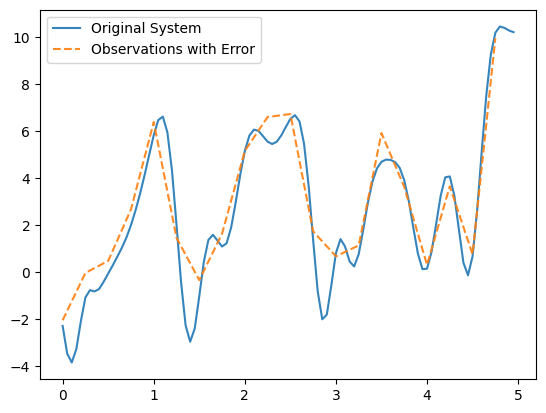

In [10]:
# Plot observations against the original values
fig, ax = plt.subplots()
ax.plot(l96.times, l96.values[:, obs_vec_l96.location_indices[0, 0]], alpha=0.9)
ax.plot(obs_vec_l96.times, obs_vec_l96.values[:, 0], '--', alpha=0.9)
ax.legend(labels=['Original System', 'Observations with Error'])
plt.show()

# 3. Filtering observations by time

In some cases, once we've generated observations we might want to select all observations within a certiain time interval. Let's use the Lorenz96 observations we generated to show an example of this.

In [11]:
# Specify time interval, centered at 2 +/- 0.75
time_start = 2 - 0.75
time_end = 2 + 0.75
# Run filter and save as new obs vec
obs_vec_l96_filt = obs_vec_l96.filter_times(start=time_start, end=time_end, inclusive=True)
print('Observation times: ', obs_vec_l96_filt.times)
print('New number of obs: ', obs_vec_l96_filt.num_obs)

Observation times:  [1.25 1.5  1.75 2.   2.25 2.5  2.75]
New number of obs:  7


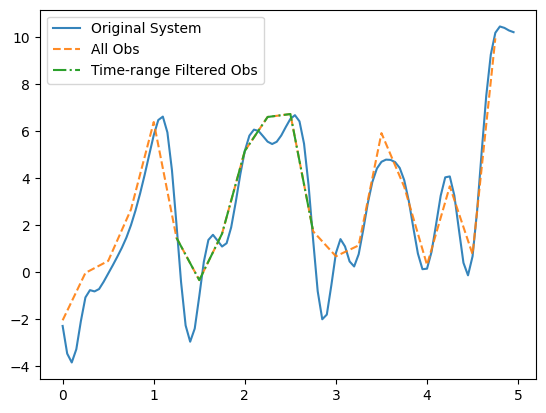

In [12]:
# Visualize
# Plot it against the original values
fig, ax = plt.subplots()
ax.plot(l96.times, l96.values[:, obs_vec_l96.location_indices[0, 0]], alpha=0.9)
ax.plot(obs_vec_l96.times, obs_vec_l96.values[:, 0], '--', alpha=0.9)
ax.plot(obs_vec_l96_filt.times, obs_vec_l96_filt.values[:, 0], '-.', alpha=1.0)
ax.legend(labels=['Original System', 'All Obs', 'Time-range Filtered Obs'])
plt.show()

# 4. Observer with locations in original coordinate dimensions

In the previous example, we specified locations to sample in the flattened, 1D space of the system's state vector. But for many data generators/loaders, the values originally exist in multi-dimensional space (e.g. latitudue, longitude, vertical level) before being flattened into a state vector. DataAssimBench's Observer class can take location indices in this original_dim instead. Let's create observations from some ERA5 data downloaded from Google Cloud.

In [13]:
gcp = dab.data.GCP()
gcp.load()
print('Time dim: ', gcp.time_dim)
print('System dim: ',gcp.system_dim)
print('Original dim: ', gcp.original_dim)

Time dim:  8784
System dim:  559
Original dim:  (13, 43)


In [14]:
# Let's sample every 500 timesteps
time_inds_gcp = np.arange(0, gcp.time_dim, 500)
# Let's pick indices at the corners and roughly center of the system
loc_inds_gcp= np.array([[0, 0], [12, 0], [12, 42], [0, 42], [6, 21]])

In [15]:
# Set up observer using our specified sampling times/locations
obs_gcp = dab.observer.Observer(
    gcp, 
    time_indices = time_inds_gcp, # Time indices to sample
    location_indices = loc_inds_gcp, # Location indices to sample
    error_bias = 0.0, # No error this time
    error_sd = 0.0
)

# Making observations
obs_vec_gcp = obs_gcp.observe()

In [16]:
# Let's examine that object
print('Sampling times: ', obs_vec_gcp.times)
print('Number of observations: ', obs_vec_gcp.num_obs)
print('Number of locations at each timestep: ', obs_vec_gcp.obs_dims[0])
print('Sampling location indices: ', obs_vec_gcp.location_indices[0])
print('Observation values: ', obs_vec_gcp.values)
print('Errors: ', obs_vec_gcp.errors)

Sampling times:  ['2020-01-01T00:00:00.000000000' '2020-01-21T20:00:00.000000000'
 '2020-02-11T16:00:00.000000000' '2020-03-03T12:00:00.000000000'
 '2020-03-24T08:00:00.000000000' '2020-04-14T04:00:00.000000000'
 '2020-05-05T00:00:00.000000000' '2020-05-25T20:00:00.000000000'
 '2020-06-15T16:00:00.000000000' '2020-07-06T12:00:00.000000000'
 '2020-07-27T08:00:00.000000000' '2020-08-17T04:00:00.000000000'
 '2020-09-07T00:00:00.000000000' '2020-09-27T20:00:00.000000000'
 '2020-10-18T16:00:00.000000000' '2020-11-08T12:00:00.000000000'
 '2020-11-29T08:00:00.000000000' '2020-12-20T04:00:00.000000000']
Number of observations:  18
Number of locations at each timestep:  5
Sampling location indices:  [[ 0  0]
 [12  0]
 [12 42]
 [ 0 42]
 [ 6 21]]
Observation values:  [[297.23501587 299.53863525 299.60635376 298.39529419 299.56481934]
 [293.4972229  296.51568604 298.66275024 297.1550293  298.37826538]
 [298.23049927 299.69537354 298.92877197 298.5039978  298.57818604]
 [297.90866089 299.37078857 2

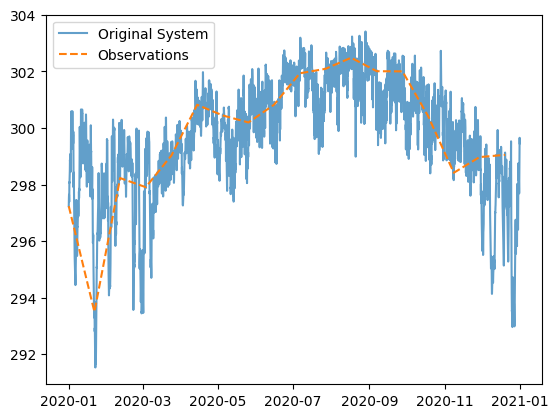

In [17]:
# Visualize
# Recall that there is no error, but our sampling is pretty infrequent compared to the actual system
# Plot it against the original values
fig, ax = plt.subplots()
ax.plot(gcp.times, gcp.values_gridded[:, 0, 0], alpha=0.7)
ax.plot(obs_vec_gcp.times, obs_vec_gcp.values[:, 0], '--', alpha=1.0)
ax.legend(labels=['Original System', 'Observations'])
plt.show()

In [18]:
# Even though these times are datetimes, we can filter our observations by time
# by using np.datetime objects.
# Let's get all observations between June 1st and September 1st:
time_start = np.datetime64('2020-06-01')
time_end = np.datetime64('2020-09-01')
# Run filter and save as new obs vec
obs_vec_gcp_filt = obs_vec_gcp.filter_times(start=time_start, end=time_end, inclusive=True)
print('Observation times: ', obs_vec_gcp_filt.times)
print('New number of obs: ', obs_vec_gcp_filt.num_obs)

Observation times:  ['2020-06-15T16:00:00.000000000' '2020-07-06T12:00:00.000000000'
 '2020-07-27T08:00:00.000000000' '2020-08-17T04:00:00.000000000']
New number of obs:  4


# 5. Non-Stationary Observer

In most cases, it's simplest to assume the observers are stationary and that we are sampling at the same location at each timestep. However, Observer allows for non-stationary observers as well, sampling different locations over time. We'll create a new set of observations from the gcp data as an example.

In [19]:
# Set up observer using our specified sampling times/locations
obs_gcp_ns = dab.observer.Observer(
    gcp, 
    random_time_density = 0.002,
    random_location_density = 0.05,
    error_bias = 0.0,
    error_sd = 3.0,
    stationary_observers=False
)

# Making observations
obs_vec_gcp_ns = obs_gcp_ns.observe()

In [20]:
print('Sampling times: ', obs_vec_gcp_ns.times)
print('Number of observations: ', obs_vec_gcp_ns.num_obs)
print('Number of locations at each timestep: ', obs_vec_gcp_ns.obs_dims)
print('Sampling location indices at first timestep: ', obs_vec_gcp_ns.location_indices[0])
print('Sampling location indices at last timestep: ', obs_vec_gcp_ns.location_indices[-1])


Sampling times:  ['2020-01-05T19:00:00.000000000' '2020-01-20T03:00:00.000000000'
 '2020-01-21T18:00:00.000000000' '2020-01-28T03:00:00.000000000'
 '2020-02-11T08:00:00.000000000' '2020-03-15T02:00:00.000000000'
 '2020-04-18T03:00:00.000000000' '2020-05-09T15:00:00.000000000'
 '2020-05-24T20:00:00.000000000' '2020-05-27T16:00:00.000000000'
 '2020-06-08T16:00:00.000000000' '2020-07-23T14:00:00.000000000'
 '2020-10-10T06:00:00.000000000' '2020-10-31T00:00:00.000000000'
 '2020-11-02T12:00:00.000000000' '2020-11-03T23:00:00.000000000']
Number of observations:  16
Number of locations at each timestep:  [28 26 32 20 23 28 35 30 29 41 35 27 23 23 36 26]
Sampling location indices at first timestep:  [ 17  22  30  35  52  63  88 106 123 128 154 176 184 212 224 243 286 306
 310 411 425 441 448 458 470 477 536 541]
Sampling location indices at last timestep:  [ 47  62  69 105 108 126 151 157 167 186 208 216 241 247 292 293 320 347
 349 360 389 398 410 435 512 540]


# 6. Spectral Models

SQGTurb is a data generator that operates in spectral space, and so their state vector stores complex numbers with real and imaginary components. Fortunately, you can transform the data back into real space using an inverse Fourier Transform. The observer will handle this operation for you automatically, and so SQGTurb can be used with the observer in the same way as the other data generators. The main difference is that location_indices will have multiple indices per timestep, since they're specified in the original gridded dimension instead of the flattened state vector.

In [21]:
sqgturb = dab.data.SQGTurb()
sqgturb.generate(n_steps=50)
print('Complex state vector length: ', sqgturb.system_dim)
print('Original gridded dimension in real space: ', sqgturb.original_dim)

Complex state vector length:  9408
Original gridded dimension in real space:  (2, 96, 96)


In [22]:
# Set up observer 
obs_sqg = dab.observer.Observer(
    sqgturb, 
    random_time_count = 50,
    random_location_count = 5,
    error_bias = 0.0,
    error_sd = 100.,
    stationary_observers=True
)
obs_vec_sqg = obs_sqg.observe()

In [23]:
print('Sampling times: ', obs_vec_sqg.times)
print('Number of observations: ', obs_vec_sqg.num_obs)
print('Number of locations at each timestep: ', obs_vec_sqg.obs_dims[0])
print('Sampling location indices: ', obs_vec_sqg.location_indices[0])

Sampling times:  [  900.  1800.  2700.  3600.  4500.  5400.  6300.  7200.  8100.  9000.
  9900. 10800. 11700. 12600. 13500. 14400. 15300. 16200. 17100. 18000.
 18900. 19800. 20700. 21600. 22500. 23400. 24300. 25200. 26100. 27000.
 27900. 28800. 29700. 30600. 31500. 32400. 33300. 34200. 35100. 36000.
 36900. 37800. 38700. 39600. 40500. 41400. 42300. 43200. 44100. 45000.]
Number of observations:  50
Number of locations at each timestep:  5
Sampling location indices:  [[ 1  2 28]
 [ 1 67 59]
 [ 1 52 79]
 [ 0 37 56]
 [ 0 71 56]]


In [24]:
# Let's get the indices of the second sampled location:
print(obs_vec_sqg.location_indices[0, 2])

[ 1 52 79]


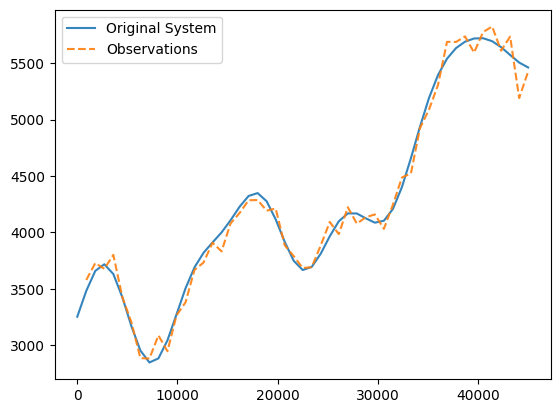

In [25]:
# Visualize
fig, ax = plt.subplots()
ax.plot(sqgturb.times, sqgturb.values_gridded[:, 1, 52, 79], alpha=0.9)
ax.plot(obs_vec_sqg.times, obs_vec_sqg.values[:, 2], '--', alpha=0.9)
ax.legend(labels=['Original System', 'Observations'])
plt.show()

# 7. Basic stationary observer with random sampling *by probability*

If you'd prefer, you can also specify a probability that each timestep or location will be sampled using random_time_density and random_location_density. For example, if you specify random_time_density = 0.5, approximately 50% of time steps will be sampled (with the proability of each time step being selected for sampling following a Bernoulli distribution with p = random_time_density). All of the examples above can be modified to use this method instead, although the exact number of times and locations sampled will vary.

NOTE: If used with stationary_observer=False, random_location_density will sample a DIFFERENT number of locations at each time step. For example, with system_dim=10 and random_location_density=0.5, it might sample 5 locations at the first timestep, 6 in the next, then 5 again, then 3, etc. It randomly selects locations at each timestep.

In [26]:
l63 = dab.data.Lorenz63()
l63.generate(n_steps=50)

In [27]:
obs_l63_p = dab.observer.Observer(
    l63, 
    random_time_density = 0.5, # Probability of picking each time step for random sampling
    random_location_density = 0.3, # Probability of picking each location in l63.system_dim for random sampling
    error_bias = 0.1,
    error_sd = 1.33
)

# Making observations
obs_vec_l63_p = obs_l63_p.observe()

In [28]:
# Let's examine that object
print('Sampling times: ', obs_vec_l63_p.times) # 28 out of 50 timesteps are sampled
print('Number of observations: ', obs_vec_l63_p.num_obs)
# In this case, 2 values (out of a total system_dim of 3) are observed at each timestep.
print('Number of locations at each timestep: ', obs_vec_l63_p.obs_dims[0])
print('Sampling location indices: ', obs_vec_l63_p.location_indices[0])
print('Observation values: ', obs_vec_l63_p.values)
print('Errors: ', obs_vec_l63_p.errors)

Sampling times:  [0.   0.01 0.02 0.03 0.04 0.05 0.07 0.09 0.1  0.16 0.18 0.21 0.23 0.25
 0.26 0.27 0.28 0.29 0.36 0.38 0.39 0.42 0.43 0.44 0.45 0.47 0.48 0.49]
Number of observations:  28
Number of locations at each timestep:  2
Sampling location indices:  [1 2]
Observation values:  [[-15.45142174  22.03606281]
 [-14.4686044   21.99438985]
 [-15.32430972  22.68675841]
 [-16.77319336  22.06791687]
 [-17.81345853  24.96373146]
 [-16.13824323  29.16772615]
 [-15.50613068  29.88428784]
 [-14.31334733  30.36502765]
 [-13.93197312  32.16670006]
 [ -8.32738498  39.13311118]
 [ -3.0457868   37.35421371]
 [ -2.37955399  35.25509374]
 [ -3.30238542  31.5764011 ]
 [ -0.86401254  31.18756508]
 [ -2.10580353  30.92742188]
 [ -0.99884478  30.53835263]
 [ -1.77255489  29.56852812]
 [ -2.37159018  30.44662647]
 [  0.9597602   22.67620324]
 [ -0.72211118  22.67191287]
 [ -1.26576014  22.48505748]
 [ -0.25174667  21.54320443]
 [ -3.1486213   20.41526382]
 [ -2.17987056  18.76455319]
 [ -2.05666771  19.3